In [12]:
import pandas as pd

In [127]:
paypred = pd.read_excel('3- Ordered Data for Hackaton.xlsx')

## Data preparation

- Drop NA values for target variables
- Impute NA - mean value for quantitative, mode for categorical
- Get dummies for categorical features


- Create y and X
- Train test split
- Scandard scale

In [128]:
paypred.drop(columns = ['State', 'Intervention Required', 'Date_of_Accident', 'Claim_Finalised_Date',
                       'Z-Score', 'Is therapy helpful for you?'], inplace = True)

paypred

,Gender,Escalated Navigation,Claim_Segment_Name,Claim_How_Reported_Name,Days_Open,RTW_Plan_Status_Name,Policy_Issue_State_Name,Accident_type_code,Nature_of_loss_code,Bodily_location_code,...,Initial_estimate,Payment_legal_defendant,Payment_legal_plaintiff,Payment_Impairment,Payment_investigation_surveillance,Net_total_incurred,Total_Paid,Other_Paid,Payment_medical,Other_paid_risk
0,1.0,1,1,1,85,1,1,23,149,461,...,36400.00,0.0,0.0,0.0,0.0,13315.74,13315.74,1079.08,10114.60,11193.68
1,2.0,0,2,1,211,1,2,41,190,680,...,8500.00,0.0,0.0,0.0,0.0,10591.49,10591.49,5047.91,5543.58,10591.49
2,1.0,0,1,1,158,1,3,44,533,310,...,32000.00,0.0,0.0,0.0,0.0,3043.82,3043.82,1155.00,542.10,1697.10
3,1.0,0,1,1,91,1,2,11,80,461,...,14400.00,0.0,0.0,0.0,0.0,7939.00,7939.00,385.00,7554.00,7939.00
4,1.0,0,1,1,121,1,3,26,118,461,...,54500.00,0.0,0.0,0.0,0.0,23416.48,23416.48,770.00,8286.48,9056.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,1.0,0,1,2,211,1,3,42,541,530,...,37000.00,0.0,0.0,0.0,0.0,26866.38,26866.38,7036.06,2930.26,9966.32
548,1.0,0,2,1,123,1,1,42,533,311,...,14900.00,0.0,0.0,0.0,0.0,6047.02,6047.02,792.19,2230.75,3022.94
549,1.0,0,1,1,175,1,2,42,330,311,...,42850.00,0.0,0.0,0.0,0.0,18620.10,18620.10,5472.11,5981.95,11454.06
550,1.0,0,2,1,127,1,1,41,533,311,...,7100.00,0.0,0.0,0.0,0.0,1973.00,1973.00,1155.00,818.00,1973.00


In [129]:
paypred.dropna(subset = ['Fitness_week2', 'Fitness_week6', 'Fitness_week12', 'Fitness_wekk26', 'Fitness_week52', 
             'Net_total_incurred','Total_Paid', 'Other_Paid', 'Payment_medical', 'Other_paid_risk',
            'Payment_legal_defendant' , 'Payment_legal_plaintiff', 'Payment_Impairment', 'Payment_investigation_surveillance'], inplace = True)

paypred.reset_index(drop=True, inplace = True)

In [16]:
paypred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 65 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Gender                                    535 non-null    float64
 1   Escalated Navigation                      540 non-null    int64  
 2   Claim_Segment_Name                        540 non-null    int64  
 3   Claim_How_Reported_Name                   540 non-null    int64  
 4   Days_Open                                 540 non-null    int64  
 5   RTW_Plan_Status_Name                      540 non-null    int64  
 6   Policy_Issue_State_Name                   540 non-null    int64  
 7   Accident_type_code                        540 non-null    int64  
 8   Nature_of_loss_code                       540 non-null    int64  
 9   Bodily_location_code                      540 non-null    int64  
 10  Med_Cert_Capacity                     

In [130]:
paypred.fillna({'Gender': paypred['Gender'].mode()[0], 
           'Med_Cert_Capacity': paypred['Med_Cert_Capacity'].mode()[0],
           'Med_cert_unfit_restricted_weekdays': paypred['Med_cert_unfit_restricted_weekdays'].mean(),
           'Work Status at Referral': paypred['Work Status at Referral'].mode()[0],
           'Are You Getting Better?': paypred['Are You Getting Better?'].mode()[0],
           'First Orebro Score' : paypred['First Orebro Score'].mean(),
           'How Do You Find Your Doctor?' : paypred['How Do You Find Your Doctor?'].mode()[0],
           'How Do You Find Your Case Manager?' : paypred['How Do You Find Your Case Manager?'].mode()[0],
           'Are you seeing a Therapist?' : paypred['Are you seeing a Therapist?'].mode()[0],
           'Unable to control the important things?' : paypred['Unable to control the important things?'].mode()[0],
           'Your ability to handle personal problems' : paypred['Your ability to handle personal problems'].mode()[0],
           'You felt that things were going your way' : paypred['You felt that things were going your way'].mode()[0],
           'Felt difficulties were piling up high?' : paypred['Felt difficulties were piling up high?'].mode()[0],
           'How are you going financially?' : paypred['How are you going financially?'].mode()[0],
           'Orebro Musculoskeletal Pain Total' : paypred['Orebro Musculoskeletal Pain Total'].mean(),
           'Claim_Risk_Assessment' : paypred['Claim_Risk_Assessment'].mode()[0],
          }, inplace=True)

paypred.isnull().sum()

Gender                     0
Escalated Navigation       0
Claim_Segment_Name         0
Claim_How_Reported_Name    0
Days_Open                  0
                          ..
Net_total_incurred         0
Total_Paid                 0
Other_Paid                 0
Payment_medical            0
Other_paid_risk            0
Length: 65, dtype: int64

In [131]:
paypred['Gender'] = pd.get_dummies(paypred['Gender'], drop_first = True)

In [49]:
paypred = pd.get_dummies(data = paypred, columns = ['Claim_Segment_Name',
       'Claim_How_Reported_Name', 'RTW_Plan_Status_Name',
       'Policy_Issue_State_Name', 'Accident_type_code', 'Nature_of_loss_code',
       'Bodily_location_code', 'Med_Cert_Capacity',
       'Interstate_workers_flag', 
       'Work Status at Referral', 'Priority', 'Navigation Status',
       'How Do You Find Your Doctor?', 'How Do You Find Your Case Manager?',
       'How long have you had your pain problem?',
       'Rate the pain that you have had?', 'I can do light work for an hour?',
       'I can sleep at night?', 'How tense or anxious have you felt?',
       'Have been bothered by feeling depressed?',
       'Risk current pain may become persistent?',
       "Chance you'll be working normal duties?",
       'Increase in pain indicates I should stop',
       'I should not do my normal work with pain',
       'Unable to control the important things?',
       'Your ability to handle personal problems',
       'You felt that things were going your way',
       'Felt difficulties were piling up high?',
       'How are you going financially?',
       'Perceived Stress Scale Short Form Total', 'Significant Stress',
      'Significant Pain Complications', 'Claim_Risk_Assessment'])

paypred

,Gender,Escalated Navigation,Days_Open,Med_cert_unfit_restricted_weekdays,Wage_amount,Payment_early_intervention_rehab,Payment_medicolegal,Payment_Rehab,Payment_travel_accomodation,Payment_weekly_compensation,...,Perceived Stress Scale Short Form Total_14,Perceived Stress Scale Short Form Total_15,Perceived Stress Scale Short Form Total_16,Significant Stress_1,Significant Stress_2,Significant Pain Complications_1,Significant Pain Complications_2,Claim_Risk_Assessment_1.0,Claim_Risk_Assessment_2.0,Claim_Risk_Assessment_3.0
0,0,1,85,33.0,365.89,385.0,0.0,0.00,694.08,2122.06,...,0,0,0,1,0,0,1,1,0,0
1,1,0,211,32.0,0.00,0.0,111.1,4936.81,0.00,0.00,...,0,0,0,1,0,1,0,1,0,0
2,0,0,158,9.0,1418.32,0.0,0.0,1155.00,0.00,1346.72,...,0,0,0,1,0,1,0,1,0,0
3,0,0,91,30.0,20.00,0.0,0.0,385.00,0.00,0.00,...,0,0,0,1,0,1,0,1,0,0
4,0,0,121,23.0,2872.00,0.0,0.0,770.00,0.00,14360.00,...,0,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,0,0,211,64.0,2278.90,0.0,0.0,7036.06,0.00,16900.06,...,0,0,0,1,0,1,0,1,0,0
536,0,0,123,11.0,2157.30,0.0,0.0,770.00,22.19,3024.08,...,0,0,0,1,0,1,0,1,0,0
537,0,0,175,77.0,1061.09,385.0,0.0,5087.11,0.00,7166.04,...,0,0,0,1,0,1,0,1,0,0
538,0,0,127,21.0,1.00,0.0,0.0,1155.00,0.00,0.00,...,0,0,0,1,0,1,0,1,0,0


In [139]:
X1 = paypred.drop(columns = ['Fitness_week2', 'Fitness_week6', 'Fitness_week12', 'Fitness_wekk26', 'Fitness_week52', 
             'Net_total_incurred','Total_Paid', 'Other_Paid', 'Payment_medical', 'Other_paid_risk',
            'Payment_legal_defendant' , 'Payment_legal_plaintiff', 'Payment_Impairment', 'Payment_investigation_surveillance', 
                             'Initial_estimate'])

X = X1.to_numpy()

y1 = np.ravel(paypred['Fitness_week2']) 
y2 = np.ravel(paypred['Fitness_week6']) 
y3 = np.ravel(paypred['Fitness_week12']) 
y4 = np.ravel(paypred['Fitness_wekk26']) 
y5 = np.ravel(paypred['Fitness_week52']) 

y6 = np.ravel(paypred['Net_total_incurred']) 
y7 = np.ravel(paypred['Total_Paid']) 
y8 = np.ravel(paypred['Other_Paid']) 
y9 = np.ravel(paypred['Payment_medical']) 
y10 = np.ravel(paypred['Other_paid_risk']) 
y11 = np.ravel(paypred['Payment_legal_defendant']) 
y12 = np.ravel(paypred['Payment_legal_plaintiff']) 
y13 = np.ravel(paypred['Payment_Impairment']) 
y14 = np.ravel(paypred['Payment_investigation_surveillance']) 

In [134]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
import shap

In [135]:
# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.1, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.1, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.1, random_state=42)
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.1, random_state=42)
X_train, X_test, y5_train, y5_test = train_test_split(X, y5, test_size=0.1, random_state=42)
X_train, X_test, y6_train, y6_test = train_test_split(X, y6, test_size=0.1, random_state=42)
X_train, X_test, y7_train, y7_test = train_test_split(X, y7, test_size=0.1, random_state=42)
X_train, X_test, y8_train, y8_test = train_test_split(X, y8, test_size=0.1, random_state=42)
X_train, X_test, y9_train, y9_test = train_test_split(X, y9, test_size=0.1, random_state=42)
X_train, X_test, y10_train, y10_test = train_test_split(X, y10, test_size=0.1, random_state=42)
X_train, X_test, y11_train, y11_test = train_test_split(X, y11, test_size=0.1, random_state=42)
X_train, X_test, y12_train, y12_test = train_test_split(X, y12, test_size=0.1, random_state=42)
X_train, X_test, y13_train, y13_test = train_test_split(X, y13, test_size=0.1, random_state=42)
X_train, X_test, y14_train, y14_test = train_test_split(X, y14, test_size=0.1, random_state=42)

In [136]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train = sc.transform(X_train)

X_test = sc.transform(X_test)

## Feature importance

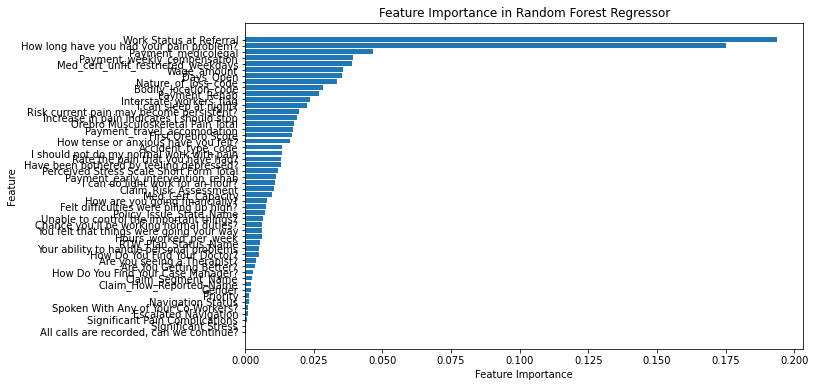

                                     Feature  Importance
20                   Work Status at Referral    0.193576
29  How long have you had your pain problem?    0.175169
15                       Payment_medicolegal    0.046630
18               Payment_weekly_compensation    0.039293
11        Med_cert_unfit_restricted_weekdays    0.038845
12                               Wage_amount    0.035781
4                                  Days_Open    0.035228
8                        Nature_of_loss_code    0.033495
9                       Bodily_location_code    0.028459
16                             Payment_Rehab    0.026815
13                   Interstate_workers_flag    0.023771
32                     I can sleep at night?    0.022498
35  Risk current pain may become persistent?    0.019530
37  Increase in pain indicates I should stop    0.019047
48         Orebro Musculoskeletal Pain Total    0.017682
17               Payment_travel_accomodation    0.017480
46                        First

In [141]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y1_train)

# Get feature importances from the trained model
feature_importances = regressor.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = X1.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

# Display the sorted feature importances
print(importance_df)


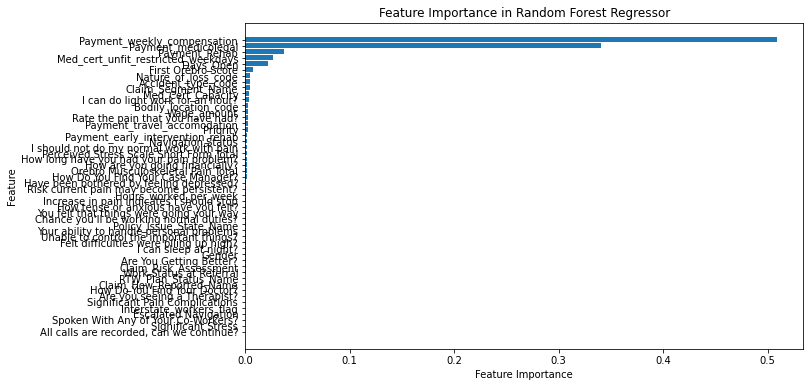

                                     Feature  Importance
18               Payment_weekly_compensation    0.508663
15                       Payment_medicolegal    0.340312
16                             Payment_Rehab    0.037258
11        Med_cert_unfit_restricted_weekdays    0.026758
4                                  Days_Open    0.021360
46                        First Orebro Score    0.007041
8                        Nature_of_loss_code    0.004674
7                         Accident_type_code    0.004507
2                         Claim_Segment_Name    0.004171
10                         Med_Cert_Capacity    0.004002
31          I can do light work for an hour?    0.003543
9                       Bodily_location_code    0.002715
12                               Wage_amount    0.002646
30          Rate the pain that you have had?    0.002498
17               Payment_travel_accomodation    0.002357
21                                  Priority    0.002347
14          Payment_early_inter

In [142]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y6_train)

# Get feature importances from the trained model
feature_importances = regressor.feature_importances_

# Create a DataFrame to display feature names and their importance scores
feature_names = X1.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance scores in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Regressor')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
plt.show()

# Display the sorted feature importances
print(importance_df)


## Regression problem - Linear, Random Forest, XGBoost


In [158]:
# Linear Regression
lr = LinearRegression()

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# XGBoost
xgboost = xgb.XGBRegressor(n_estimators=100, random_state=42)


for i in range(6,15):
    y_train = locals()['y'+str(i)+'_train']
    y_test = locals()['y'+str(i)+'_test']
    
    lr.fit(X_train, y_train)
    
    lr_pred = lr.predict(X_test)
    lr_mae = mean_absolute_error(y_test, lr_pred)
    lr_mse = mean_squared_error(y_test, lr_pred)
    lr_rmse = np.sqrt(lr_mse)

    #print(str(i) + f" Linear MSE: {lr_mse}")

    rf.fit(X_train, y_train)

    # Evaluate Random Forest
    rf_pred = rf.predict(X_test)
    rf_mae = mean_absolute_error(y_test, rf_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    rf_rmse = np.sqrt(rf_mse)

    #print(str(i) + f" RF MSE: {rf_mse}")

    xgboost.fit(X_train, y_train)

    # Evaluate XGBoost
    xgboost_pred = xgboost.predict(X_test)
    xgboost_mae = mean_absolute_error(y_test, xgboost_pred)
    xgboost_mse = mean_squared_error(y_test, xgboost_pred)
    xgboost_rmse = np.sqrt(xgboost_mse)

    #print(str(i) + f" XGBoost MSE: {xgboost_mse}")
    
    
    pickle.dump(xgboost, open('xgboost'+str(i)+'.pkl', 'wb'))


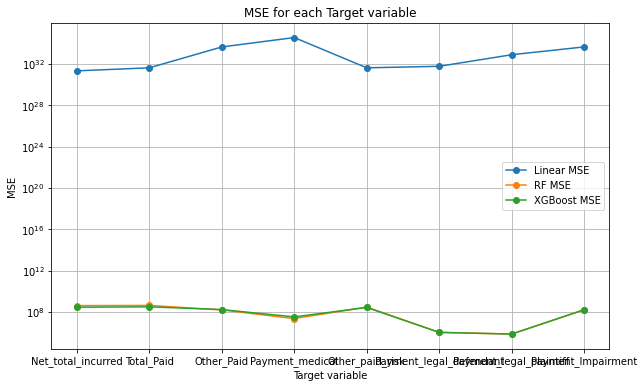

In [64]:
import matplotlib.pyplot as plt

# Data
feature_counts = ['Net_total_incurred','Total_Paid', 'Other_Paid', 'Payment_medical', 'Other_paid_risk',
            'Payment_legal_defendant' , 'Payment_legal_plaintiff', 'Payment_Impairment']
linear_mse = [2.1551140676917297e+31, 4.235295763209612e+31, 4.418461586369175e+33, 3.5869061756562125e+34, 4.235295763209678e+31, 5.949867847854088e+31, 7.800999219602347e+32, 4.4656140309391233e+33]
rf_mse = [411392357.20363516, 431792580.2371578, 156886074.40733472, 22777999.144330904, 295775719.97838205, 1071225.3484111237, 729648.9113092591, 163828129.66162607]
xgboost_mse = [290049965.1116605, 314246157.0023277, 170273236.08745798, 33210721.55757339, 273926796.8484412, 1052202.019365191, 726851.852036094, 163783553.1314564]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(feature_counts, linear_mse, marker='o', label='Linear MSE')
plt.plot(feature_counts, rf_mse, marker='o', label='RF MSE')
plt.plot(feature_counts, xgboost_mse, marker='o', label='XGBoost MSE')
plt.title('MSE for each Target variable')
plt.xlabel('Target variable')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Use logarithmic scale for the y-axis
plt.show()

In [60]:
from sklearn.feature_selection import RFE

lr = LinearRegression()

rfe = RFE(lr)
X_train_rfe = rfe.fit_transform(X_train, y1_train)
X_test_rfe = rfe.transform(X_test)

lr.fit(X_train_rfe, y1_train)
lr_pred = lr.predict(X_test_rfe)

lr_mse = mean_squared_error(y1_test, lr_pred)

print(str(i) + f" Linear MSE: {lr_mse}")

13 Linear MSE: 1.3129827375154694e+28


In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


14 Linear MSE: 529440394.2650491


In [ ]:

lr.fit(X_train_pca, y6_train)

lr_pred = lr.predict(X_test_pca)

lr_mse = mean_squared_error(y6_test, lr_pred)

print(str(i) + f" Linear MSE: {lr_mse}")

In [105]:
rf.fit(X_train_pca, y6_train)
rf_pred = rf.predict(X_test_pca)
rf_mse = mean_squared_error(y6_test, rf_pred)

print(str(i) + f" RF MSE: {rf_mse}")

14 RF MSE: 517265630.151462


In [106]:
xgboost.fit(X_train_pca, y6_train)
xgboost_pred = xgboost.predict(X_test_pca)
xgboost_mse = mean_squared_error(y6_test, xgboost_pred)

print(str(i) + f" XG MSE: {xgboost_mse}")

14 XG MSE: 495369663.9470599


In [ ]:
# SHAP Interpretability for XGBoost
explainer = shap.Explainer(xgboost)
shap_values = explainer(X_test)

# Summarize the feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Use SHAP force plot for a specific prediction
# Replace 'index_of_interest' with the index of the data point you want to interpret
shap.force_plot(explainer.expected_value, shap_values[1], X_test.iloc[1])

## Classification - SVC, PCA

In [109]:
from sklearn.svm import SVC

svm = SVC(kernel='poly', random_state=1)
svm.fit(X_train, y1_train)

svm_accuracy_train = svm.score(X_train, y1_train)

print(f'Accuracy of SVM on train set = {svm_accuracy_train:.3f}')

svm_accuracy_test = svm.score(X_test, y1_test)

print(f'Accuracy of SVM on test set = {svm_accuracy_test:.3f}')

Accuracy of SVM on train set = 0.728
Accuracy of SVM on test set = 0.407


In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lor = LogisticRegression()

lor.fit(X_train, y1_train)

y_pred_train = lor.predict(X_train)
y_pred_test = lor.predict(X_test)

lr_accuracy_train = accuracy_score(y1_train, y_pred_train)

print(f'Accuracy of LR on train set = {lr_accuracy_train:.3f}')

lr_accuracy_test = accuracy_score(y1_test, y_pred_test)

print(f'Accuracy of LR on test set = {lr_accuracy_test:.3f}')

Accuracy of LR on train set = 0.819
Accuracy of LR on test set = 0.667


In [155]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y1_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y1_train, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7160493827160493


In [123]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

svm.fit(X_train_pca, y1_train)

svm_pca_accuracy_train = svm.score(X_train_pca, y1_train)

print(f'Accuracy of SVM with PCA on train set = {svm_pca_accuracy_train:.3f}')

svm_pca_accuracy_test = svm.score(X_test_pca, y1_test)

print(f'Accuracy of SVM with PCA on test set = {svm_pca_accuracy_test:.3f}')

Accuracy of SVM with PCA on train set = 0.733
Accuracy of SVM with PCA on test set = 0.593


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


pca = PCA(n_components = 10)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lor = LogisticRegression()

lor.fit(X_train_pca, y1_train)
y_pred = lor.predict(X_test_pca)

accuracy = accuracy_score(y1_test, y_pred)

accuracy

0.6666666666666666

## Pickle export model

In [159]:
for i in range(1,6):
    y_train = locals()['y'+str(i)+'_train']
    y_test = locals()['y'+str(i)+'_test']
    
    lor.fit(X_train, y_train)
    
    pickle.dump(lor, open('lor'+str(i)+'.pkl', 'wb'))

In [ ]:
# Cross-validation for Linear Regression
lr_cv_mae = np.mean(cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=5))
lr_cv_rmse = np.mean(cross_val_score(lr, X, y, scoring='neg_root_mean_squared_error', cv=5))

# Cross-validation for Random Forest
rf_cv_mae = np.mean(cross_val_score(rf, X, y, scoring='neg_mean_absolute_error', cv=5))
rf_cv_rmse = np.mean(cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=5))

# Cross-validation for XGBoost
xgboost_cv_mae = np.mean(cross_val_score(xgboost, X, y, scoring='neg_mean_absolute_error', cv=5))
xgboost_cv_rmse = np.mean(cross_val_score(xgboost, X, y, scoring='neg_root_mean_squared_error', cv=5))

print("\nCross-Validation Metrics:")
print(f"Linear Regression CV MAE: {lr_cv_mae}")
print(f"Linear Regression CV RMSE: {lr_cv_rmse}")
print(f"Random Forest CV MAE: {rf_cv_mae}")
print(f"Random Forest CV RMSE: {rf_cv_rmse}")
print(f"XGBoost CV MAE: {xgboost_cv_mae}")
print(f"XGBoost CV RMSE: {xgboost_cv_rmse}")